# Assigment 5

Using the linked dataset below produce a series of visualisations demonstrating the use of Matplotlib.

You should produce at least one of the following: 

Bar Graph.
Pie Chart.
Box Plot.
Line Chart.
Scatter Plot.

Once you have demonstrated use of the different plots you should look at the data and make some conclusions from the data set. Can you find any links?

Present your conclusion illustrated with appropriate visualisations.

Submit your completed notebook.


# Import all the libraries 

In [4]:

import matplotlib.pyplot as plt # for creating static, animated, and interactive visualizations in Python
import pandas as pd # for data manipulation and analysis 
import numpy as np ## working with arrays and to perform a wide variety of mathematical operations on arrays
import seaborn as sns # making statistical graphics in Python

##### 1-Load Data set
Load earthquake dataset with function pd.read_csv

In [5]:
ek = pd.read_csv("all_month.csv")

##### 2-Look at the data structure
Visualize the first 5 rows is achieve by using df.head()
We can see wach row represents a earthquake.
There are 21 atributes: time, latitude, depth, magnitude, magtype, nst, gap, dmin, rms, updated, place, type, horizontalerror, deptherror, magerror, magnst, status, locationSource, MagSource

In [6]:
ek.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-22T02:21:07.540Z,35.504500,-118.392667,3.86,1.02,ml,15.0,101.0,0.1713,0.15,...,2023-01-22T02:24:37.288Z,"13km SE of Bodfish, CA",earthquake,0.33,0.80,0.144,12.0,automatic,ci,ci
1,2023-01-22T01:57:03.130Z,38.824833,-122.801666,2.55,1.89,md,32.0,33.0,NaN,0.02,...,2023-01-22T02:14:11.186Z,"7km NW of The Geysers, CA",earthquake,0.17,0.33,0.180,34.0,automatic,nc,nc
2,2023-01-22T01:56:26.625Z,64.627100,-150.159800,12.40,1.90,ml,NaN,NaN,NaN,0.50,...,2023-01-22T01:58:03.893Z,"47 km SSE of Manley Hot Springs, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak
3,2023-01-22T01:53:47.160Z,19.259832,-155.420502,29.02,2.09,md,31.0,117.0,NaN,0.19,...,2023-01-22T01:57:01.360Z,"8 km NE of Pāhala, Hawaii",earthquake,0.68,0.94,1.790,14.0,automatic,hv,hv
4,2023-01-22T01:51:05.588Z,64.592500,-149.799600,18.00,1.50,ml,NaN,NaN,NaN,0.13,...,2023-01-22T01:52:59.631Z,"32 km W of Four Mile Road, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak


Get a quick description of the data. 
There are 9410 entries in the data set. We can see that some variables have missing variable data.
For example mg, magtype,nst, gap,dmin, horizontalerror, magerror,magnst present missing values
There are 12 variable as floats (e.g 0.222), and 10 as objects, which is text based.

In [7]:
ek.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9410 entries, 0 to 9409
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9410 non-null   object 
 1   latitude         9410 non-null   float64
 2   longitude        9410 non-null   float64
 3   depth            9410 non-null   float64
 4   mag              9409 non-null   float64
 5   magType          9409 non-null   object 
 6   nst              6823 non-null   float64
 7   gap              6822 non-null   float64
 8   dmin             5053 non-null   float64
 9   rms              9410 non-null   float64
 10  net              9410 non-null   object 
 11  id               9410 non-null   object 
 12  updated          9410 non-null   object 
 13  place            9410 non-null   object 
 14  type             9410 non-null   object 
 15  horizontalError  6347 non-null   float64
 16  depthError       9410 non-null   float64
 17  magError      

 Here we can see how many missing values are missing
  checking the dataset for missing values

In [8]:
ek.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   1
magType               1
nst                2587
gap                2588
dmin               4357
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    3063
depthError            0
magError           2665
magNst             2600
status                0
locationSource        0
magSource             0
dtype: int64

replacing empty values with Nan

In [9]:
ek['mag']=ek['mag'].replace({'':np.nan})

I use the .replace() method but with a condition that checks if the value is '' or None and then replace it with np.nan

In [10]:
ek.replace(to_replace={col: {'':np.nan, None:np.nan} for col in ek.columns}, inplace=True)

In [11]:
ek.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   1
magType               1
nst                2587
gap                2588
dmin               4357
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    3063
depthError            0
magError           2665
magNst             2600
status                0
locationSource        0
magSource             0
dtype: int64

replace missing values with median, as normally disctribution for the selected column
mag, nst,gap,dmin, horizontalError,magError, magNst
FILLNA

In [12]:

ek['mag'] = ek['mag'].fillna(ek['mag'].median())
ek['nst'] = ek['nst'].fillna(ek['nst'].median())
ek['gap'] = ek['gap'].fillna(ek['gap'].median())
ek['dmin'] = ek['dmin'].fillna(ek['dmin'].median())
ek['horizontalError'] = ek['horizontalError'].fillna(ek['horizontalError'].median())
ek['magError'] = ek['magError'].fillna(ek['magError'].median())
ek['magNst'] = ek['magNst'].fillna(ek['magNst'].median())

In [13]:
## new dataset after replacing missing values
ek.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-22T02:21:07.540Z,35.504500,-118.392667,3.86,1.02,ml,15.0,101.0,0.17130,0.15,...,2023-01-22T02:24:37.288Z,"13km SE of Bodfish, CA",earthquake,0.33,0.80,0.144,12.0,automatic,ci,ci
1,2023-01-22T01:57:03.130Z,38.824833,-122.801666,2.55,1.89,md,32.0,33.0,0.06309,0.02,...,2023-01-22T02:14:11.186Z,"7km NW of The Geysers, CA",earthquake,0.17,0.33,0.180,34.0,automatic,nc,nc
2,2023-01-22T01:56:26.625Z,64.627100,-150.159800,12.40,1.90,ml,17.0,106.0,0.06309,0.50,...,2023-01-22T01:58:03.893Z,"47 km SSE of Manley Hot Springs, Alaska",earthquake,0.44,0.50,0.169,9.0,automatic,ak,ak
3,2023-01-22T01:53:47.160Z,19.259832,-155.420502,29.02,2.09,md,31.0,117.0,0.06309,0.19,...,2023-01-22T01:57:01.360Z,"8 km NE of Pāhala, Hawaii",earthquake,0.68,0.94,1.790,14.0,automatic,hv,hv
4,2023-01-22T01:51:05.588Z,64.592500,-149.799600,18.00,1.50,ml,17.0,106.0,0.06309,0.13,...,2023-01-22T01:52:59.631Z,"32 km W of Four Mile Road, Alaska",earthquake,0.44,0.30,0.169,9.0,automatic,ak,ak


Verfy if I still missing data
I can see that in mag and magType I still have one with a missing data but this type of data is Text based

In [14]:
ek.isnull().sum()

time               0
latitude           0
longitude          0
depth              0
mag                0
magType            1
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
status             0
locationSource     0
magSource          0
dtype: int64

In [15]:
ek['place'] = ek['place'].astype(str)

Find what Categories exist, where did the earthquake occurs.
It seems that Alaska Peninsula had more earthquakes that other localities 

In [16]:
ek["place"].value_counts()

Alaska Peninsula                         206
8km NW of The Geysers, CA                123
Southern Alaska                          113
Central Alaska                           111
85 km NW of Karluk, Alaska               101
                                        ... 
10km NNW of Borrego Springs, CA            1
15 km SSW of Point Possession, Alaska      1
43 km N of Valdez, Alaska                  1
102 km NNW of Karluk, Alaska               1
92 km N of Karluk, Alaska                  1
Name: place, Length: 4873, dtype: int64

The describe method shows a summary of the numerical attributes 
Note that null values are ignored
For example, we can see the magnitude of earthquakes varies between  -1.23 to 7.60, the mean magnitude is low (1.64) which means majority of the earthquakes are low magnitude 
(we dont even feel them)
We can see mean, standart deviation, and percentils- cThe median is consider the second quartile

In [17]:
ek.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,9410.000000,9410.000000,9410.000000,9410.000000,9410.000000,9410.000000,9410.000000,9410.000000,9410.000000,9410.000000,9410.000000,9410.000000
mean,40.694347,-117.863831,25.593011,1.644990,21.643146,115.759475,0.430516,0.294069,1.289183,2.083547,0.246215,13.729118
std,20.430642,66.380624,54.697555,1.230045,19.072025,53.448595,2.005756,0.276421,2.609678,15.786392,0.407296,20.027440
min,-65.407100,-179.973800,-3.330000,-1.120000,0.000000,14.000000,0.000000,0.000000,0.070000,0.000000,0.000000,0.000000
25%,33.431417,-154.926417,2.972500,0.890000,12.000000,83.000000,0.056000,0.090000,0.320000,0.420000,0.133972,7.000000
50%,38.830166,-122.852837,9.125811,1.430000,17.000000,106.000000,0.063090,0.176600,0.440000,0.710000,0.169000,9.000000
75%,58.247167,-116.722042,25.296000,2.100000,24.000000,136.000000,0.070025,0.470000,0.610000,1.400000,0.208785,14.000000
max,82.000600,179.944100,635.507000,7.600000,289.000000,352.540000,56.433000,2.000000,23.780000,1350.300000,5.190000,768.000000


Another way to see the data that I am dealing with 

Histogram shows the number of instances ( on vertical axis) that have a given value range ( on the horizintal axis). 
I can either plot a histogram one attribute at a time, or I can call the hist() method on the whole dataset 

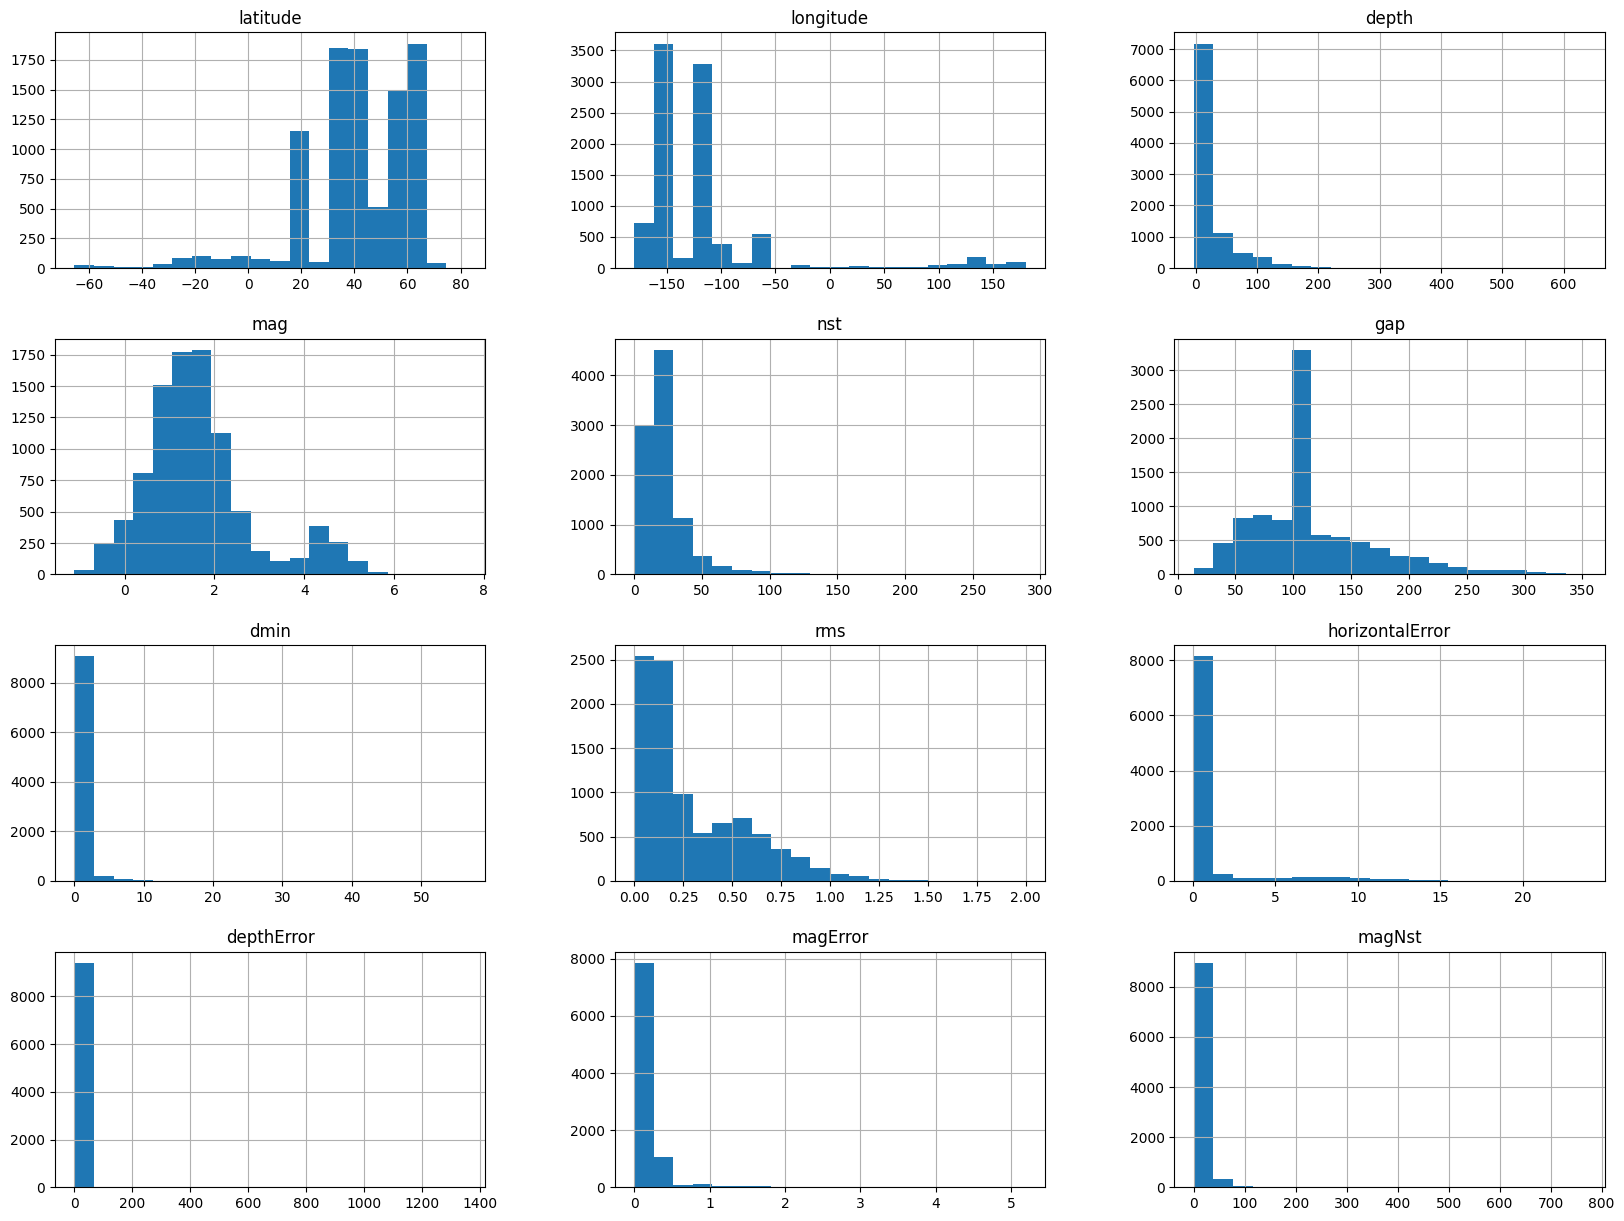

In [18]:
ek.hist (bins=20, figsize=(20,15))
plt.show()

Create a unique histogram for magnitude 

array([[<AxesSubplot: title={'center': 'mag'}>]], dtype=object)

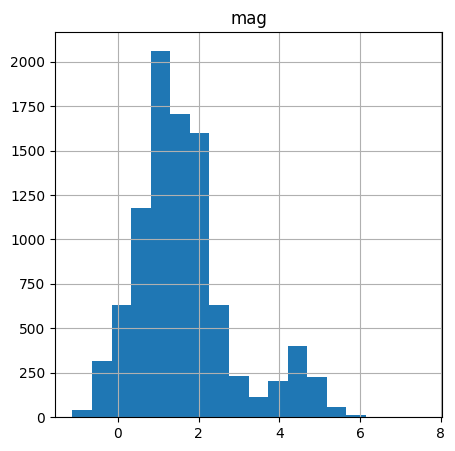

In [19]:
ek.hist ("mag", bins=18, figsize=(5,5))

using seaborn for graphic 


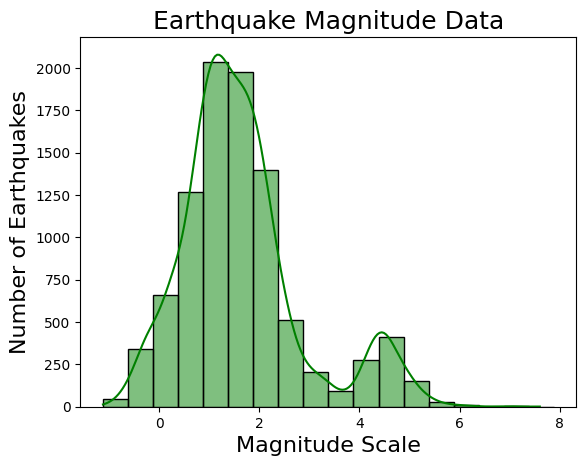

In [20]:
sns.histplot(data=ek['mag'], binwidth=0.5, kde=True,color="green")
plt.title('Earthquake Magnitude Data', fontsize=18)
plt.xlabel('Magnitude Scale', fontsize=16)
plt.ylabel('Number of Earthquakes', fontsize=16)
plt.gca().set_facecolor('none') # para tirar a linhas cizentas

Visualizing Geographical data
Alpha helps us to visualize place where there is high desity of data points

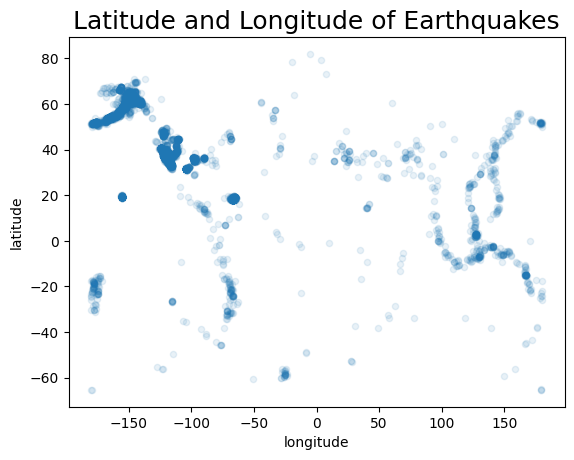

In [21]:
ek.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.1)
plt.title('Latitude and Longitude of Earthquakes', fontsize=18)
plt.gca().set_facecolor('none') # para tirar a linhas cizentas

Visualizing Geographical data
Alpha helps us to visualize place where there is high desity of data points

C:\Users\jlapa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


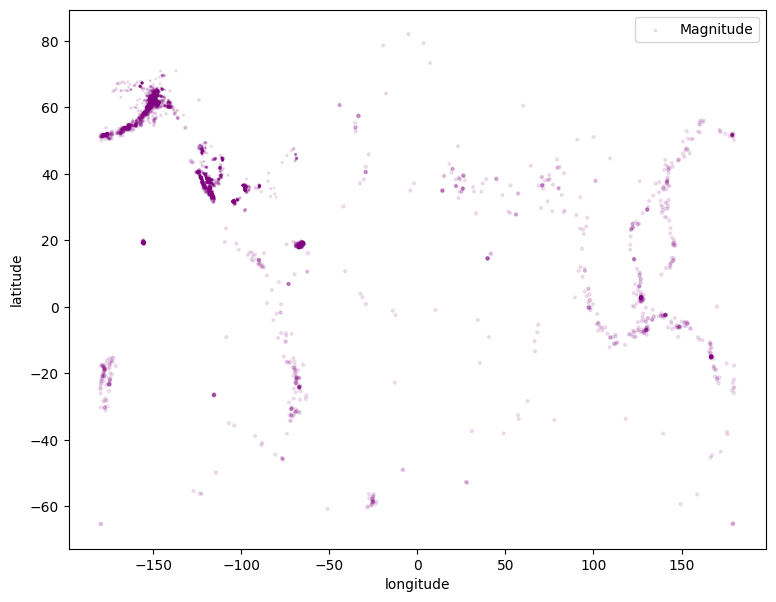

In [36]:
ek.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.1,s=ek["mag"], label="Magnitude",figsize=(9,7),color="purple")
plt.legend()

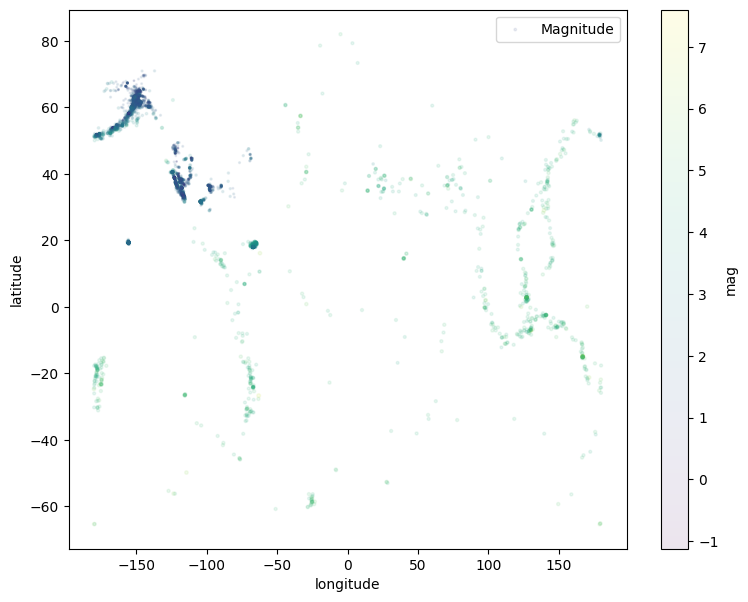

In [37]:
ek.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, s=ek["mag"], c='mag', cmap='viridis', label="Magnitude", figsize=(9, 7))
plt.legend()


To create a pie chart of the percentage of the networks transmission of earthquake

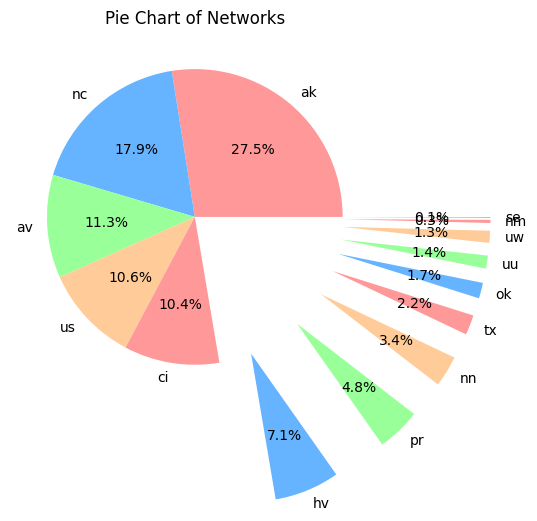

In [38]:
# Create a pandas series containing the data
data = ek['net'].value_counts() # data is a pandas series containing the counts of each type of network transmiting earthquake

# Create the pie chart
colors = ["#ff9999","#66b3ff","#99ff99","#ffcc99"]
#autopct parameter is used to format the values of the chart, in this case it is showing the percentage with one decimal point.
explode = [ 1 if i < 0.1 else 0 for i in data/data.sum()]
plt.pie(data, labels=data.index, autopct='%1.1f%%',colors=colors,explode = explode) #labels parameter is used to provide the categories of the data, in this case the different types of networks

plt.title('Pie Chart of Networks', loc="center")
plt.show()

Creating a box plot for depth
I think this means that earthquakes with highs dephts are rare , which makes sense as the data showed us that majority of the earthwakes are micro earthwakes

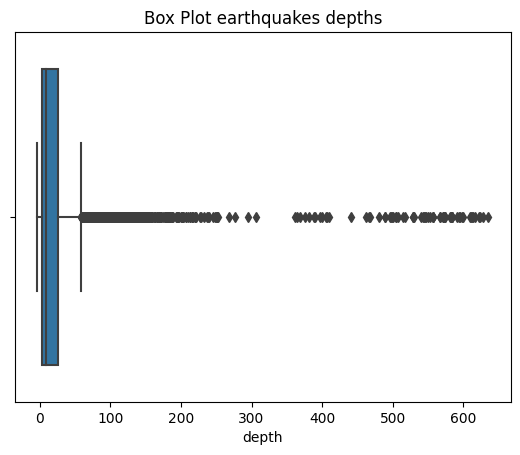

In [39]:
sns.boxplot(x=ek["depth"])
plt.title('Box Plot earthquakes depths', loc="center")
plt.gca().set_facecolor('none') # para tirar a linhas cizentas

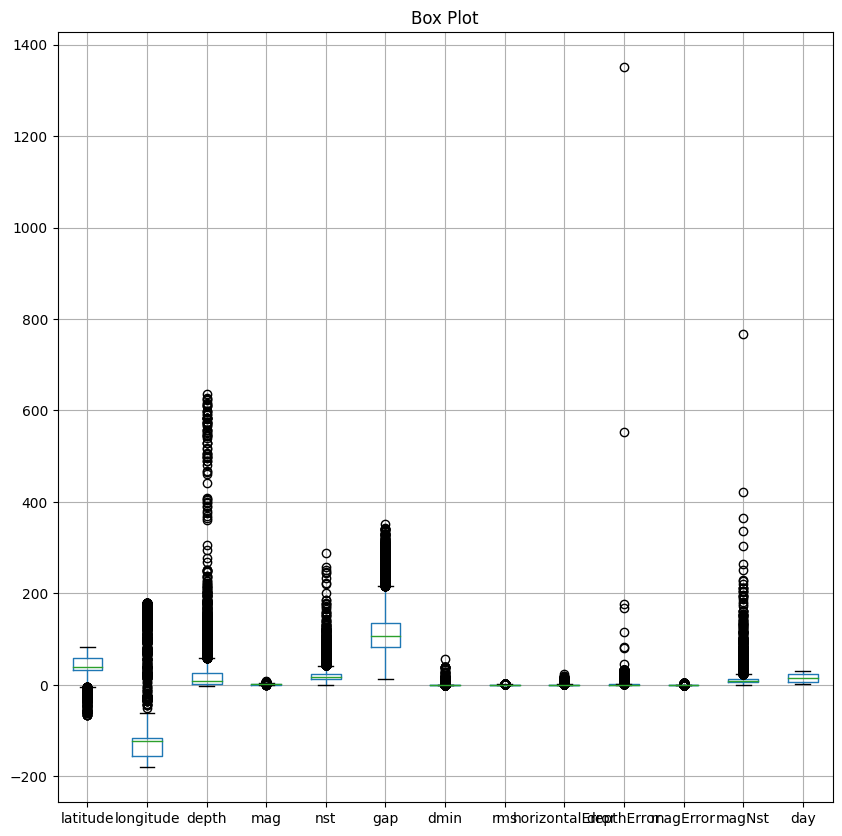

In [40]:
ek.boxplot(figsize=(10,10))
plt.title('Box Plot', loc="center")
plt.gca().set_facecolor('none') # para tirar a linhas cizentas
plt.show()

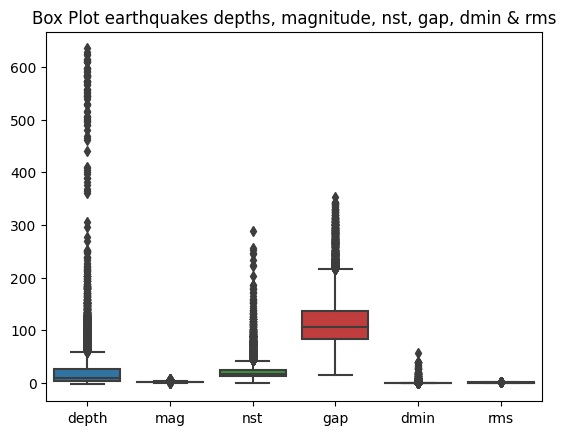

In [41]:
sns.boxplot(data=ek[["depth", "mag", "nst","gap","dmin","rms",]])
plt.title('Box Plot earthquakes depths, magnitude, nst, gap, dmin & rms', loc="center")
plt.gca().set_facecolor('none') # para tirar a linhas cizentas

Looking fo correlations


In [42]:
corr_matrix = ek.corr()

C:\Users\jlapa\AppData\Local\Temp\ipykernel_5116\3003863826.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = ek.corr()


In [43]:
corr_matrix["mag"].sort_values(ascending=False)

mag                1.000000
horizontalError    0.718677
longitude          0.614498
nst                0.536688
rms                0.519409
dmin               0.445421
magNst             0.407887
depth              0.402348
depthError         0.060876
day                0.008983
magError          -0.006204
gap               -0.049802
latitude          -0.560202
Name: mag, dtype: float64

array([[<AxesSubplot: xlabel='mag', ylabel='mag'>,
        <AxesSubplot: xlabel='gap', ylabel='mag'>,
        <AxesSubplot: xlabel='depth', ylabel='mag'>,
        <AxesSubplot: xlabel='nst', ylabel='mag'>,
        <AxesSubplot: xlabel='rms', ylabel='mag'>,
        <AxesSubplot: xlabel='horizontalError', ylabel='mag'>],
       [<AxesSubplot: xlabel='mag', ylabel='gap'>,
        <AxesSubplot: xlabel='gap', ylabel='gap'>,
        <AxesSubplot: xlabel='depth', ylabel='gap'>,
        <AxesSubplot: xlabel='nst', ylabel='gap'>,
        <AxesSubplot: xlabel='rms', ylabel='gap'>,
        <AxesSubplot: xlabel='horizontalError', ylabel='gap'>],
       [<AxesSubplot: xlabel='mag', ylabel='depth'>,
        <AxesSubplot: xlabel='gap', ylabel='depth'>,
        <AxesSubplot: xlabel='depth', ylabel='depth'>,
        <AxesSubplot: xlabel='nst', ylabel='depth'>,
        <AxesSubplot: xlabel='rms', ylabel='depth'>,
        <AxesSubplot: xlabel='horizontalError', ylabel='depth'>],
       [<AxesSubplot: xla

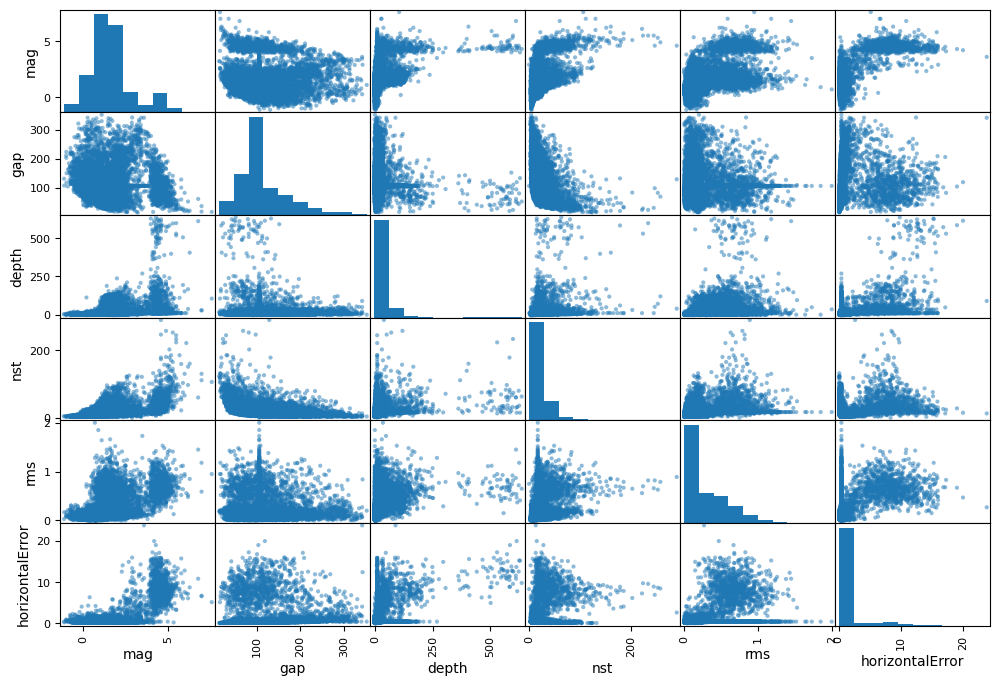

In [44]:
from pandas.plotting import scatter_matrix
attributes = ["mag","gap","depth","nst","rms", "horizontalError"]
scatter_matrix(ek[attributes], figsize=(12,8))

Extract the day from the 'time' column

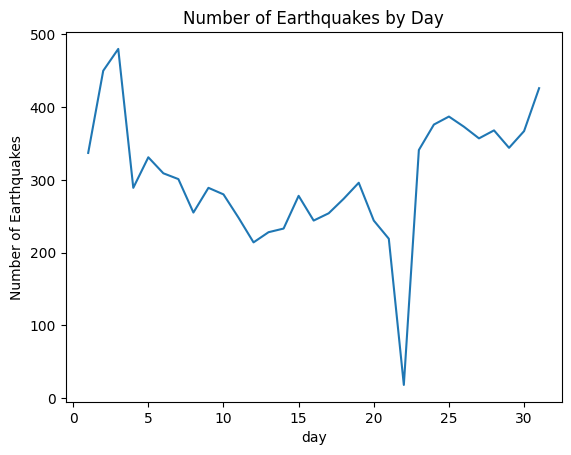

In [45]:
ek['day'] = pd.DatetimeIndex(ek['time']).day

# Group the data by year and count the number of earthquakes
ek_by_day = ek.groupby('day').size()

# Create a line chart showing the number of earthquakes by year
plt.plot(ek_by_day.index, ek_by_day.values)
plt.xlabel('day')
plt.ylabel('Number of Earthquakes')
plt.title('Number of Earthquakes by Day')
plt.show()


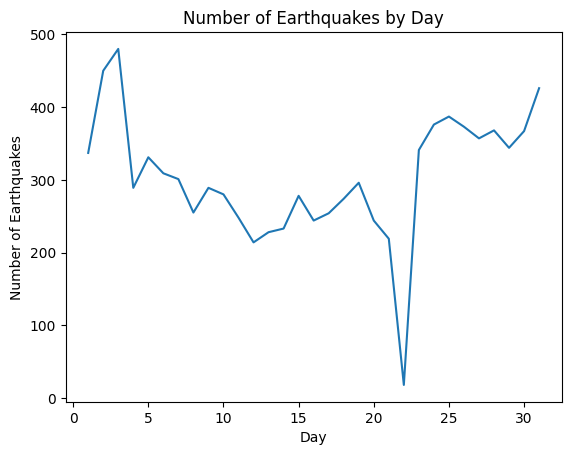

In [46]:

# Extract the day from the 'time' column
ek['day'] = pd.DatetimeIndex(ek['time']).day

# Group the data by day and count the number of earthquakes
ek_by_day = ek.groupby('day').size()

# Create a line chart showing the number of earthquakes by day
sns.lineplot(x=ek_by_day.index, y=ek_by_day.values)
plt.xlabel('Day')
plt.ylabel('Number of Earthquakes')
plt.title('Number of Earthquakes by Day')
plt.gca().set_facecolor('none') # para tirar a linhas cizentas
plt.show()


In [47]:
ek_by_day = ek['day'].value_counts()

print(ek_by_day)

3     480
2     450
31    426
25    387
24    376
26    373
28    368
30    367
27    357
29    344
23    341
1     337
5     331
6     309
7     301
19    296
9     289
4     289
10    280
15    278
18    274
8     255
17    254
11    248
16    244
20    244
14    233
13    228
21    219
12    214
22     18
Name: day, dtype: int64


In [ ]:
## check datatype of time, using dtype fuction
print(ek['time'].dtype)

datetime64[ns, UTC]


In [ ]:
# since the data type is a object, i have now to use pandas fuction to_datatime to covert it to datatime
ek['time'] = pd.to_datetime(ek['time'])


In [ ]:
#I can now extract the month and day and create the 'month_day' column as I showed before
ek['month_day'] = ek['time'].dt.strftime('%m-%d')


Create a panda bar chart which shows only the 10 most commom places where earthquakes occur and the number of earthquakes
ek["place"] defines the variable in the dataset 
.valuecounts  ist to cont the number of values, 
[:10] only to show the 10 most common places
.plot means the type of bar

<AxesSubplot: >

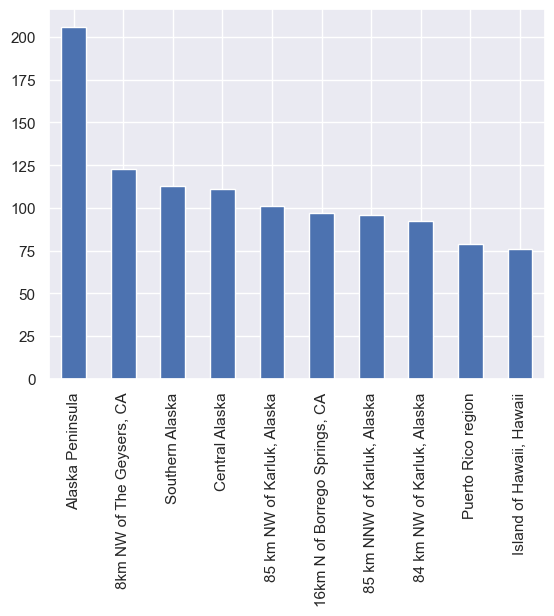

In [ ]:

pd.Series(ek["place"]).value_counts()[:10].plot(kind="bar")


#ame graf as above but now as on seaborn

<AxesSubplot: xlabel='place', ylabel='count'>

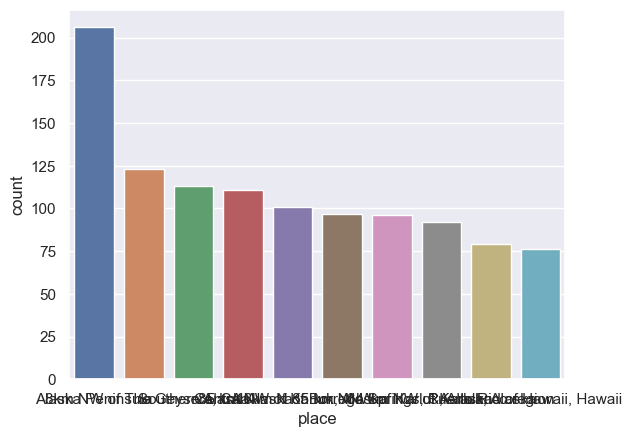

In [ ]:
sns.countplot(x='place', data=ek, order=ek['place'].value_counts().iloc[:10].index)

In [ ]:
ek["place"].size

9410